# IMPORTING LIBRARIES

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

C:\Users\ASUS\anaconda3\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


# FOR VISUALIZING 

In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns

# IMPORTING DATASET 

In [3]:
df = pd.read_csv("Titanic-Dataset.csv")

In [4]:
df.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


# DROPPING FEATURES WHICH ARE IRRELEVANT

In [5]:
df.drop(["Name","Ticket","Cabin","PassengerId"],axis=1,inplace=True)

In [6]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [7]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


# Checking survival rate of each class

OBSERVATION:-
    Most of the passengers were from 3rd Class but not most survived 

In [8]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [9]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

# Checking survival rate of males and female

OBSERVATION:- Most of survivors were females

In [10]:
df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived')

,Sex,Survived
1,male,0.188908
0,female,0.742038


# Survival Rates of people with siblings/spouces or parent/children

OBSERVATION:- 
    <br>&emsp;&emsp;&emsp;&emsp;People with 1 or 2 Siblings/Spouses had much better chance of survival
    <br>&emsp;&emsp;&emsp;&emsp;People with siblings/Spouses more than 4 had no chance of Survival

In [11]:
df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived',ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


OBSERVATION:- 
    <br>&emsp;&emsp;&emsp;&emsp;People with 1 or 3 Parent/children had much better chance of survival
    <br>&emsp;&emsp;&emsp;&emsp;People with 2 parent/children had 50% chance of surviving
    <br>&emsp;&emsp;&emsp;&emsp;People with siblings/Spouses more than 4 had a very low chance of Survival

In [12]:
df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


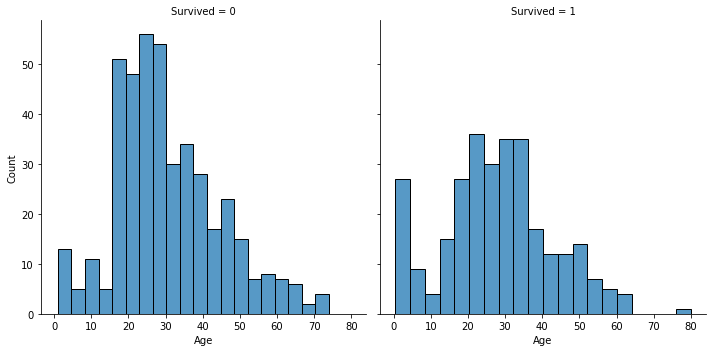

In [13]:
g = sns.FacetGrid(df, col = "Survived", size = 5)
g.map(sns.histplot, "Age", bins = 20)
plt.show()

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


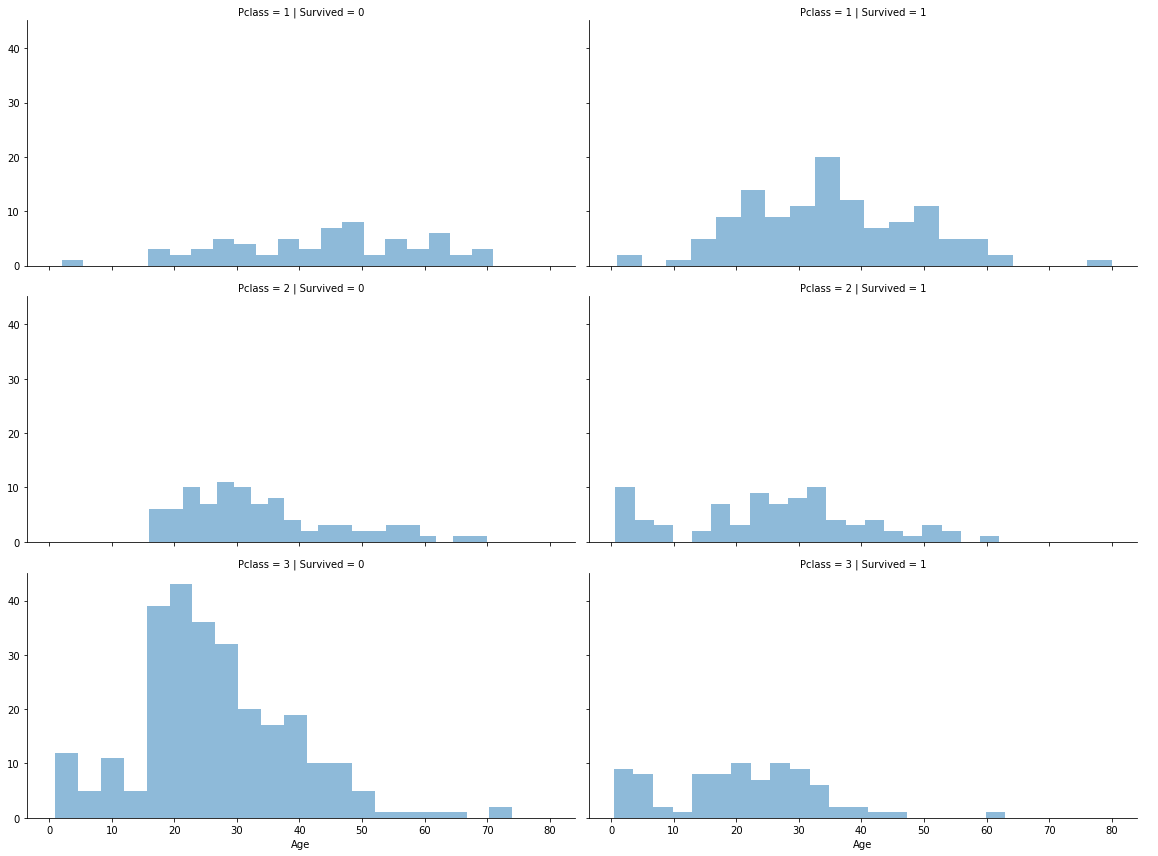

In [14]:
grid = sns.FacetGrid(df, col='Survived', row='Pclass', size=4, aspect=2)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

# Checking survival rates of males and females of diffferent embarking from 3 different cities C,S,Q

OBSERVATION:-
<br>&emsp;&emsp;&emsp;&emsp;Female passengers had much better survival rate than males.
<br>&emsp;&emsp;&emsp;&emsp;Exception in Embarked=C where males had higher survival rate.
<br>&emsp;&emsp;&emsp;&emsp;Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports.

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


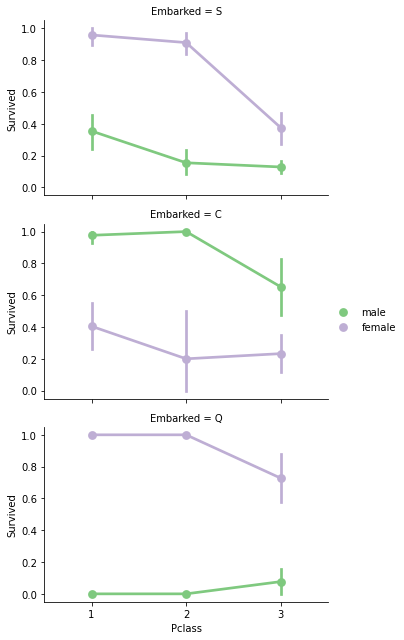

In [15]:
g = sns.FacetGrid(df, row='Embarked', size=3, aspect=1.6)
g.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='Accent')
g.add_legend()

# Encoding

In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for x in ['Sex', 'Embarked']:
    df[x] = le.fit_transform(df[x])  

# Filling Null values

In [17]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
5,0,3,1,NaN,0,0,8.4583,1
6,0,1,1,54.0,0,0,51.8625,2
7,0,3,1,2.0,3,1,21.0750,2
8,1,3,0,27.0,0,2,11.1333,2
9,1,2,0,14.0,1,0,30.0708,0


In [18]:
df.interpolate(method ='quadratic', limit_direction ='forward', inplace=True)

In [19]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [20]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
5,0,3,1,56.320363,0,0,8.4583,1
6,0,1,1,54.000000,0,0,51.8625,2
7,0,3,1,2.000000,3,1,21.0750,2
8,1,3,0,27.000000,0,2,11.1333,2
9,1,2,0,14.000000,1,0,30.0708,0


# Normalising inputs and splitting dataset into testing and training data

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X=df.drop("Survived",axis=1)
y=df["Survived"]

In [23]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X)

In [24]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=42)

# Initializing the model

In [25]:
model1 = tf.keras.models.Sequential()
model1.add(tf.keras.layers.Dense(units = 4, activation = 'relu'))
model1.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))
model1.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00105), loss = 'binary_crossentropy', metrics = ["accuracy"])

model1.fit(X_train, y_train, validation_data=(X_test,y_test), epochs = 500, batch_size = 10)

Epoch 1/500
72/72 [==============================] - 2s 11ms/step - loss: 0.6483 - accuracy: 0.6236 - val_loss: 0.6539 - val_accuracy: 0.5866
Epoch 2/500
72/72 [==============================] - 0s 4ms/step - loss: 0.6350 - accuracy: 0.6236 - val_loss: 0.6431 - val_accuracy: 0.5866
Epoch 3/500
72/72 [==============================] - 0s 5ms/step - loss: 0.6235 - accuracy: 0.6236 - val_loss: 0.6336 - val_accuracy: 0.5866
Epoch 4/500
72/72 [==============================] - 0s 4ms/step - loss: 0.6137 - accuracy: 0.6236 - val_loss: 0.6242 - val_accuracy: 0.5866
Epoch 5/500
72/72 [==============================] - 0s 4ms/step - loss: 0.6055 - accuracy: 0.6236 - val_loss: 0.6158 - val_accuracy: 0.5866
Epoch 6/500
72/72 [==============================] - 0s 4ms/step - loss: 0.5973 - accuracy: 0.6236 - val_loss: 0.6069 - val_accuracy: 0.6034
Epoch 7/500
72/72 [==============================] - 0s 4ms/step - loss: 0.5896 - accuracy: 0.6278 - val_loss: 0.5988 - val_accuracy: 0.6145
Epoch 8/500


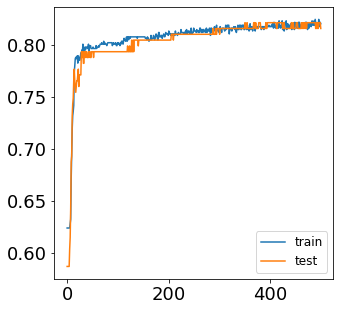

In [31]:
history = model1.history
loss = history.history['loss']
train = history.history['accuracy']
val_loss = history.history['val_loss']
test = history.history['val_accuracy']
plt.rcParams.update({'font.size': 18})

plt.figure(figsize=(5,5))
plt.plot(range(len(train)), train)

plt.plot(range(len(test)), test)
plt.legend(['train', 'test'], fontsize = 12)


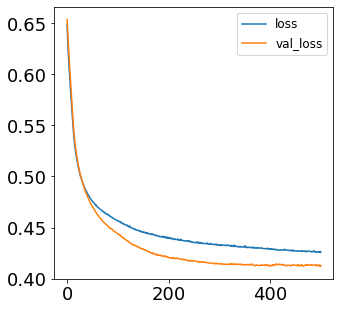

In [27]:
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(5,5))

plt.plot(range(len(loss)), loss)
plt.plot(range(len(val_loss)), val_loss)
plt.legend(['loss', 'val_loss'], fontsize = 12)

In [32]:
m1 = tf.keras.models.Sequential()
m1.add(tf.keras.layers.Dense(units = 4, activation = 'relu'))
m1.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))
m1.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01), loss = 'binary_crossentropy', metrics = ["accuracy"])

m1.fit(X_train, y_train, validation_data=(X_test,y_test), epochs = 1000, batch_size = 10)

Epoch 1/500
72/72 [==============================] - 6s 56ms/step - loss: 0.6116 - accuracy: 0.6812 - val_loss: 0.5390 - val_accuracy: 0.7821
Epoch 2/500
72/72 [==============================] - 0s 5ms/step - loss: 0.5026 - accuracy: 0.7949 - val_loss: 0.4886 - val_accuracy: 0.7933
Epoch 3/500
72/72 [==============================] - 0s 4ms/step - loss: 0.4773 - accuracy: 0.7978 - val_loss: 0.4724 - val_accuracy: 0.7821
Epoch 4/500
72/72 [==============================] - 0s 4ms/step - loss: 0.4655 - accuracy: 0.8048 - val_loss: 0.4641 - val_accuracy: 0.7821
Epoch 5/500
72/72 [==============================] - 0s 2ms/step - loss: 0.4632 - accuracy: 0.8048 - val_loss: 0.4577 - val_accuracy: 0.7765
Epoch 6/500
72/72 [==============================] - 0s 2ms/step - loss: 0.4543 - accuracy: 0.8090 - val_loss: 0.4526 - val_accuracy: 0.7877
Epoch 7/500
72/72 [==============================] - 0s 2ms/step - loss: 0.4503 - accuracy: 0.8104 - val_loss: 0.4498 - val_accuracy: 0.7821
Epoch 8/500


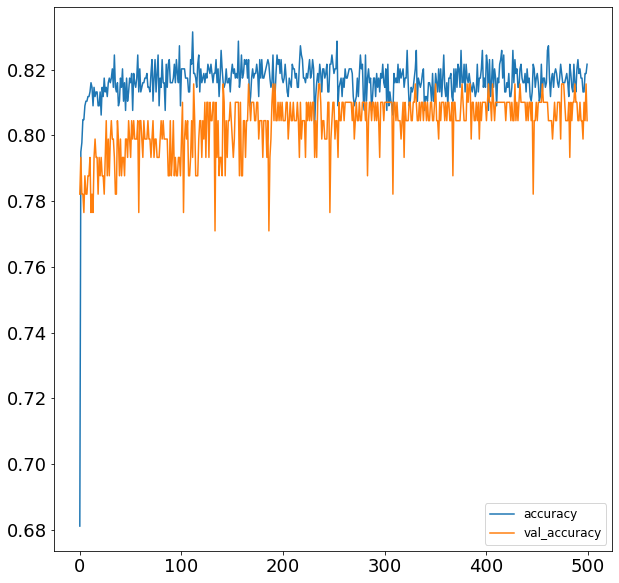

In [33]:
history = m1.history
loss = history.history['loss']
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']
plt.rcParams.update({'font.size': 18})

plt.figure(figsize=(10,10))
plt.plot(range(len(accuracy)), accuracy)

plt.plot(range(len(val_accuracy)), val_accuracy)
plt.legend(['accuracy', 'val_accuracy'], fontsize = 12)


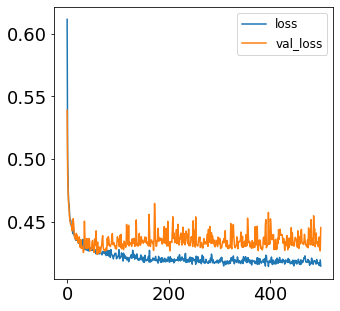

In [34]:
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(5,5))

plt.plot(range(len(loss)), loss)
plt.plot(range(len(val_loss)), val_loss)
plt.legend(['loss', 'val_loss'], fontsize = 12)